<a href="https://colab.research.google.com/github/ancientpi3/Fellowship2022/blob/main/experiments/Visualize_DCGAN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab import drive
from google.colab import files
from zipfile import ZipFile
import cv2
import os
from PIL import Image
from keras.initializers import RandomNormal
from google.colab.patches import cv2_imshow
import gc

In [2]:
drive.mount('/content/gdrive')
filename = "/content/gdrive/MyDrive/celeba_train.zip"


with ZipFile(filename, "r",) as zip:
  zip.extractall(path="/content/celeba_train")


Mounted at /content/gdrive


In [3]:
!git clone https://github.com/ancientpi3/Fellowship2022.git
from Fellowship2022.modules import DCGAN

Cloning into 'Fellowship2022'...
remote: Enumerating objects: 306, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 306 (delta 67), reused 138 (delta 54), pack-reused 140
Receiving objects: 100% (306/306), 311.50 MiB | 29.23 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Updating files: 100% (38/38), done.


In [4]:
folder_path_train="/content/celeba_train"
x_train = DCGAN.folder_to_numpy(folder_path_train,take=40)

<Figure size 432x288 with 0 Axes>

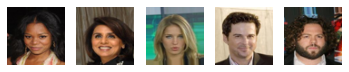

In [5]:
plt.figure()
count=5
f, axarr = plt.subplots(1,count)

for i in range(count):
  axarr[i].imshow((x_train[i]+1)/2)
  axarr[i].axis('off')

<Figure size 432x288 with 0 Axes>

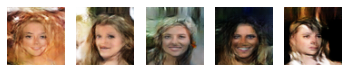

In [7]:
g_model = DCGAN.generator()
g_model.load_weights("/content/Fellowship2022/models/celeba_generator_40000_v1.h5")

fake_images = DCGAN.grab_fake_batch(g_model, 25)

plt.figure()
count=5
offset=0

f, axarr = plt.subplots(1,count)

for i in range(count):
  axarr[i].imshow((fake_images[i+offset]+1)/2)
  axarr[i].axis('off')

<Figure size 432x288 with 0 Axes>

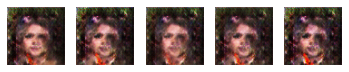

In [14]:
g_model_400 = DCGAN.generator()
g_model_400.load_weights("/content/Fellowship2022/models/celeba_generator_400_v1.h5")
fake_images = DCGAN.grab_fake_batch(g_model_400, 25)
plt.figure()
count=5
offset=0
f, axarr = plt.subplots(1,count)
for i in range(count):
  axarr[i].imshow((fake_images[i+offset]+1)/2)
  axarr[i].axis('off')

<Figure size 432x288 with 0 Axes>

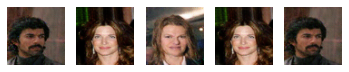

In [24]:
g_model_40 = DCGAN.generator()
g_model_40.load_weights("/content/Fellowship2022/models/celeba_generator_40_v1.h5")
fake_images = DCGAN.grab_fake_batch(g_model_40, 25)
plt.figure()
count=5
offset=0
f, axarr = plt.subplots(1,count)
for i in range(count):
  axarr[i].imshow((fake_images[i+offset]+1)/2)
  axarr[i].axis('off')

In [68]:
def folder_to_numpy_all(folder_path):
  images = []

  for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
      image = Image.open(os.path.join(folder_path, filename))
      image=image.resize((64,64))
      images.append(np.array(image))

  images = np.array(images)
  images = 2*(images/255)-1
  return images

In [69]:
x_train = folder_to_numpy_all("/content/celeba_train")

In [70]:
x_train.shape

(40000, 64, 64, 3)

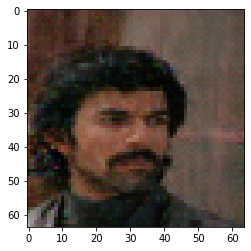

In [71]:
test_image = (fake_images[0]+1)/2

plt.imshow(test_image)

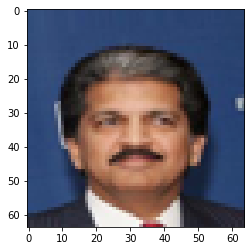

In [72]:
real_image = (x_train[0]+1)/2
plt.imshow(real_image)

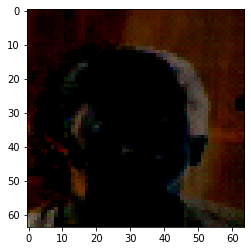

In [73]:
image_difference = test_image-real_image
plt.imshow(image_difference)

In [74]:
np.sum(image_difference)

-1303.1322952582555

0.03363628794492933

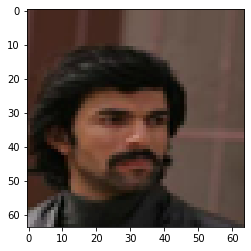

In [93]:
def find_mimic():
  for i in x_train:
    i = (i+1)/2
    s = np.std(test_image-i)
    if abs(s) < .1:
      #plt.imshow(i)
      return i

i = find_mimic()
type(i)
plt.imshow(i)
np.std(test_image-i)

0.03363628794492933

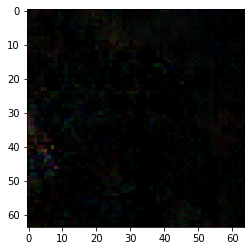

In [95]:
plt.imshow(test_image-i)
np.std(test_image-i)

In [97]:
np.average(test_image-i)

0.005826269119288967